# <u> ASTR 5490: Homework 2 (Time-Domain Astronomy / Fourier Transforms) </u>

# 1) Experimenting with Fourier Components
## $S(t) = C_0 + C_1\cos\left(1\frac{2\pi(t-t_0)}{P}\right) + C_2\cos\left(2\frac{2\pi(t-t_0)}{P}\right) + C_3\cos\left(3\frac{2\pi(t-t_0)}{P}\right) + ...$

In [1]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.timeseries import LombScargle

In [2]:
# Class to calculate Fourier components
class Fourier:
    
    # Initialize the instance of this Class with the following properties
    def __init__(self,c,start,end,period=1.0,t0=0.0,parity='both'):
        # Inputs
        #    c: list of coefficients in front of Fourier components
        #    period: period of signal (default is 1)
        #    t0: reference time for signal (default is 0)
        
        # Define list of coefficients
        self.c = c
        
        # Define parity
        self.parity = parity
        
        # Calculate renormalization factor
        self.R = np.sum(c)
        
        # Define period and reference time
        self.period = period
        self.t0 = t0
        
        # Make a list of times to evaluate signal at (2 periods)
        self.t = np.linspace(start*period,end*period,100)
        
        # Calculate phase of Fourier components
        self.phase = [(t-self.t0)/self.period for t in self.t]

    # Function to calcuate signal vs. time
    def FourierSignal(self):
        
        # Define empty list of signal amplitude values
        S = []
        
        # Define multiple within cosine argument depending on which terms you're interested in
        if self.parity == 'even':
            
            # Makes evenly spaced list of even numbers
            multiples = np.arange(2,2*len(c),2)      
                
        elif self.parity == 'odd':
            
            # Makes evenly spaced list of odd numbers
            multiples = np.arange(1,2*len(c)+1,2)
            
        elif self.parity == 'both':
            
            # Make list of numbers from 0 to length of coefficient list
            multiples = np.arange(1,len(c),1)
            
        # Calculate signal value for each phase value
        for phi in self.phase:
            
            # Define C_0 as first term (assumed to be first term of user-entered coefficient array)
            terms = self.c[0]
            
            # Add all Fourier terms you're interested in
            for i in range(1,len(c)):
                terms += self.c[i]*np.cos(multiples[i-1]*2*np.pi*phi)
                
            # Append normalized signal value to signal array
            S.append(1/self.R*terms)

        return(self.c,self.phase,self.t,S)
    
    # Function to plot signal vs. time
    def FourierPlotter(self,xaxis,linestyle='solid',legend=True):
        
        c,phi,t,S = self.FourierSignal()
        
        # Plot signal vs. time
        ax = plt.subplot(111)
        
        # Plot S vs. t
        label = r'First {0} {1} coeff.'.format(len(c),self.parity)
        
        if xaxis == 'phase':
            ax.plot(phi,S,label=label,linestyle=linestyle)
            ax.set_xlabel('Phase',fontsize=14)
        elif xaxis == 'time':
            ax.plot(t,S,label=label,linestyle=linestyle)
            ax.set_xlabel('Time (period)',fontsize=14)

        # Add plot labels
        ax.axhline(0,color='black',linestyle='dashed')
        
        ax.set_ylabel('S(t)',fontsize=14)
        
        if legend == True:
            ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
            
        ax.set_title('Signal vs. Time',fontsize=18)

In [3]:
# Make list of linestyles
linsty = ['solid','dashed','dotted','dashdot']

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

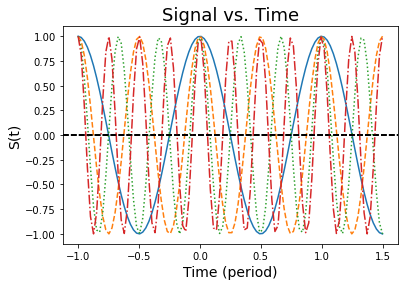

In [4]:
# Make a list of Fourier coefficients so they're all 0
c = np.zeros(5)

# Loop over each coefficient
for i in range(1,len(c)):
    
    # Set different cofficient equal to 1
    c[i] = 1

    # Create instance of class for this set of coefficients and plot form of Fourier component
    fourier = Fourier(c,start=-1,end=1.5)
    fourier.FourierPlotter(xaxis='time',linestyle=linsty[i-1],legend=False)
    
    # Reset particular coefficient to 1 for next loop
    c[i] = 0

## 1a) Let $C_1=C_2=1$ and $C_{>2}=0$

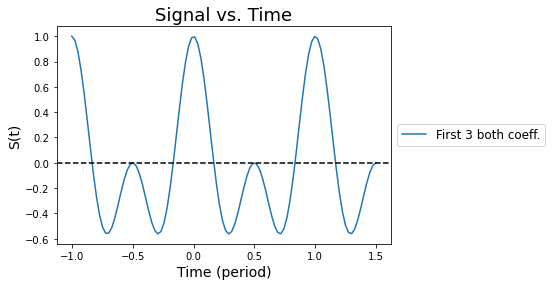

In [5]:
# Make a list of Fourier coefficients
c = [0,1,1]

# Create instance of class for this set of coefficients 
fourierOddEven = Fourier(c,start=-1,end=1.5)

# Plot form of Fourier components
fourierOddEven.FourierPlotter(xaxis='time')

### If we compare the graph from 1a to the graph with $C_1$ through $C_4$, we see that adding the first odd and even components reduces the amplitude of the even peaks (second, fourth, part of sixth) where the individual functions have opposing maxima/minima. The odd peaks (first, third, fifth) remain the same since they share a maxima there.

## 1b) First four even components with equal power

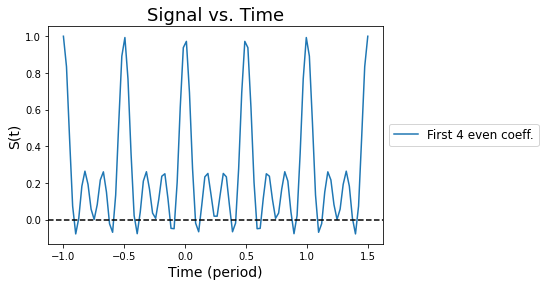

In [6]:
# Make a list of Fourier coefficients of equal power
c = np.ones(4)

# Create instance of class for set first four even coefficients 
fourierEven = Fourier(c,start=-1,end=1.5,parity='even')

# Plot form of Fourier components
fourierEven.FourierPlotter(xaxis='time')

## 1b) Adding increasingly more even components with equal power

In [7]:
# Define array with different numbers of coefficients
numComponents = [10,20]

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


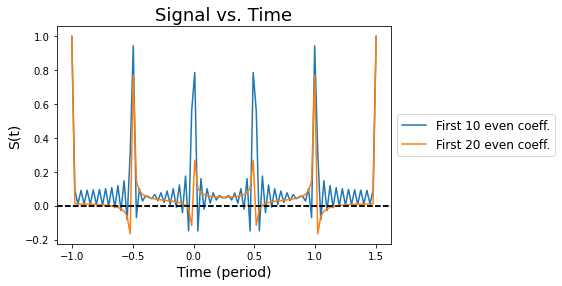

In [8]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make list of ones
    c = np.ones(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='even')
    instance.FourierPlotter(xaxis='time')

### Adding increasingly more even components with equal power decreases the amplitude of all the oscillations and makes the oscillations narrower

## 1c) First four even components with successive components at half power

In [9]:
# Function to make a list of a descending geometric series
def DescendingGeometric(length):
    
    # Make list of coefficients that are all 1
    c = np.ones(length)
    
    # Multiply each component by another factor of 1/2
    for i in range(1,len(c)):
        c[i] *= .5/i
        
    return(c)

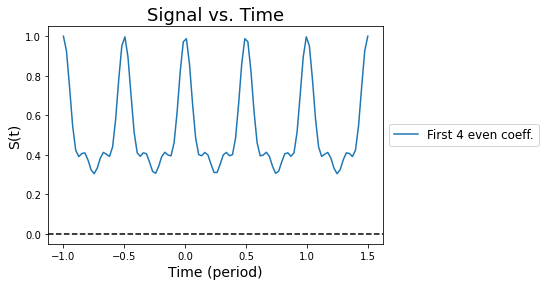

In [10]:
# Make a list of first four even Fourier coefficients with successively half-powers
c = DescendingGeometric(4)
    
# Create instance of class for set of first 4 even coefficients 
fourierGeometric = Fourier(c,start=-1,end=1.5,parity = 'even')

# Plot form of Fourier components
fourierGeometric.FourierPlotter(xaxis='time')

## 1b) Adding increasingly more even components with half power

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


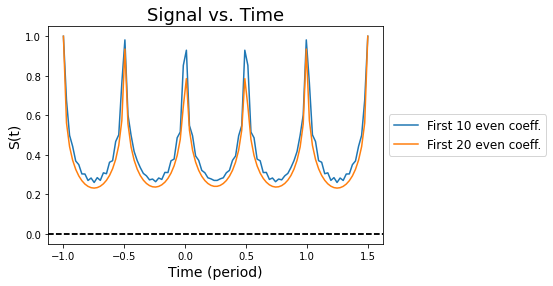

In [11]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make a list of even Fourier coefficients with successively half-powers
    c = DescendingGeometric(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='even')
    instance.FourierPlotter(xaxis='time')

### Adding more components smooths this function out and makes the peaks narrower. Another demonstration of how adding more Fourier components produced a smoother wave.

## 1d) First Four Odd Terms with Equal Power

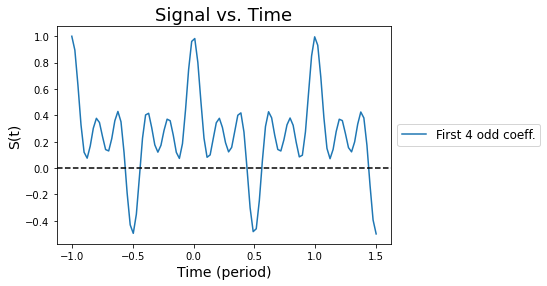

In [12]:
# Make a list of Fourier coefficients of equal power
c = np.ones(4)

# Create instance of class for set first four odd coefficients 
fourierEven = Fourier(c,start=-1,end=1.5,parity='odd')

# Plot form of Fourier components
fourierEven.FourierPlotter(xaxis='time')

## 1d) Adding increasingly more odd components with half power

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


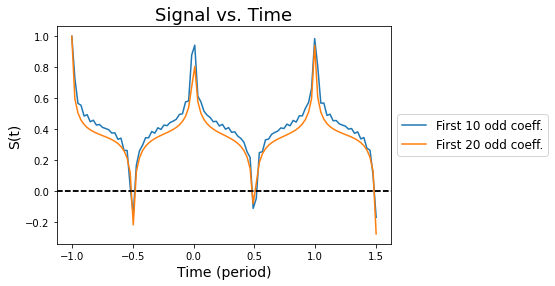

In [13]:
# Plot Fourier series with different numbers of terms
for num in numComponents:
    
    # Make a list of even Fourier coefficients with successively half-powers
    c = DescendingGeometric(num)
    
    # Create instance of Fourier class and plot Fourier series
    instance = Fourier(c,start=-1,end=1.5,parity='odd')
    instance.FourierPlotter(xaxis='time')

## 1e) Qualitatively Reproducing Astronomical Periodic Phenomena

### Light curve of a contact binary star

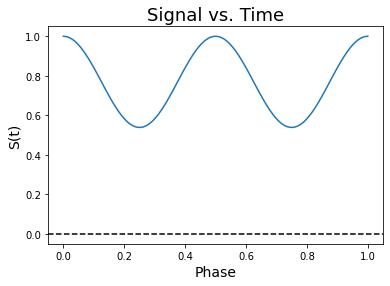

In [14]:
c = [1,0,.3]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Velocity curve of a planet in an e=0 orbit

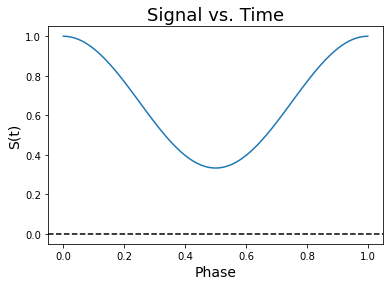

In [15]:
c = [1,.5]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Velocity curve of a planet in an e>>0 orbit

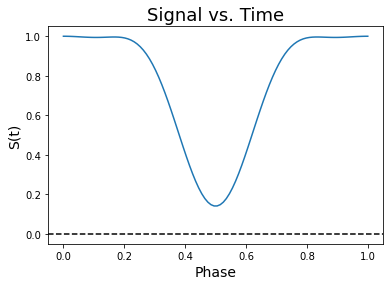

In [16]:
c = [2,1,-.5,.13]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Light curve of an eclipsing binary star system with two stars of same temp.

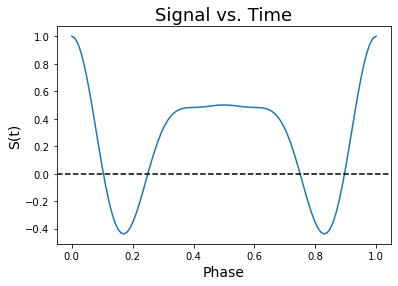

In [17]:
c = [2,-1,3,3,1]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

### Light curve of a planet transit (top hat)

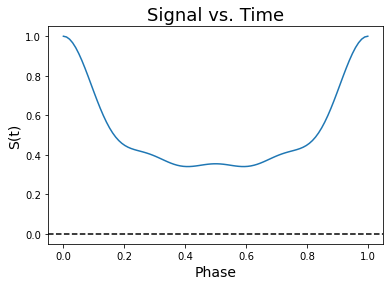

In [18]:
c = [2,1,.5,.25,.125]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

## 1f) Plotting Cn vs n for transiting planet profile

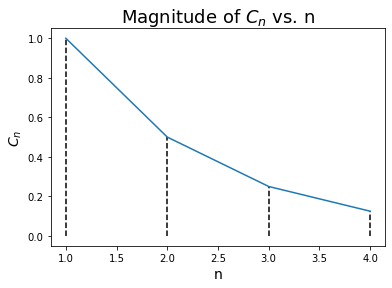

In [19]:
# Plotting Cn vs n
n = [1,2,3,4]
plt.plot(n,c[1:5])
plt.title(r'Magnitude of $C_n$ vs. n',fontsize=18)
plt.xlabel('n',fontsize=14)
plt.ylabel(r'$C_n$',fontsize=14)
for value in n:
    plt.vlines(value,0,c[value],linestyle='dashed')

### Light curve of a pulsating star

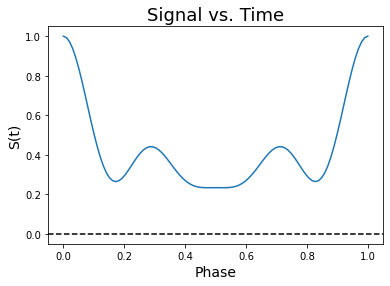

In [20]:
c = [2,1,.5,.8,.4]
instance = Fourier(c,start=0,end=1,parity='both')
instance.FourierPlotter(xaxis='phase',legend=False)

# 2) Real Contact Binary Star Light Curve

## 2a) Flux vs. Date

In [223]:
# Function for plotting light curves from text file
def LightCurve(filename,objectname,numPoints,period=None,plot='Time',curve='Flux'):
    
    # Read in raw data file
    data = np.genfromtxt(filename,names=True)

    # Extract time, flux, and error data from text file
    times,fluxes,errors = np.loadtxt(filename,skiprows=1,unpack=True,usecols=[0,1,2])
    
    # Decide what times array to make
    if numPoints == None:
        times = [time - times[0] for time in times]
    else:
        times = [time - times[0] for time in times[:numPoints]]
        fluxes = fluxes[:numPoints]       
    
    # Initialize axis figure and axis
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Decide what x-axis should be
    if plot == 'Time':
        xlabel = 'Time (days)'
        
        # Plot flux vs time
        ax.plot(times,fluxes)
        
    elif plot == 'Phase':
        xlabel = 'Phase'
        
        # Calculate phase from time data
        phases = [(time%period)/period for time in times]
        
        # Make a scatter plot of flux vs. phase
        ax.scatter(phases,fluxes,label='Period = {0:.3f} days'.format(period))
        
    # Add plot features
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_ylabel('{0}'.format(curve),fontsize=14)
    ax.set_title('{0} vs. {1} for {2}'.format(curve,plot,objectname),fontsize=18)
    ax.legend()

No handles with labels found to put in legend.


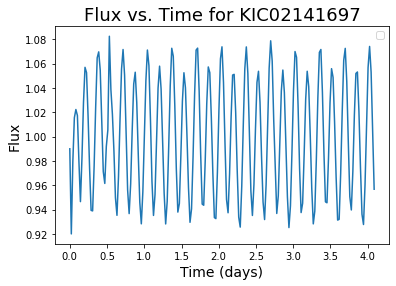

In [224]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',200)

### From the raw light curve, it looks like only 1 Fourier component might be required to match it because it looks like a single cosine function, with a short period (high frequency).

## 2b) Make Power Spectrum with astropy.timeseries.LombScargle for entire Kepler Quarter 2 dataset (from SIMBAD: period = 0.331 days)

In [203]:
# Function to generate power spectrum from a flux vs. time dataset
def LS(filename,objectname,minP,maxP,numIntervals,i,trueP,days=None):

    # Extract time, flux, and error data from text file
    times,fluxes,errors = np.loadtxt(filename,skiprows=1,unpack=True,usecols=[0,1,2])
    
    if days != None:
        increment = days*50 # Approximately 50 data points per day
        times,fluxes,errors = times[:increment],fluxes[:increment],errors[:increment]
    
    # Define range of frequencies to search over
    minfreq = 1./maxP
    maxfreq = 1./minP

    # Make list of frequencies within the range
    frequency = np.linspace(minfreq,maxfreq,numIntervals)

    # Use LombScargle method to calculate power as a function of those frequencies
    power = LombScargle(times,fluxes,errors,nterms=i).power(frequency)
    
    # Find maximum power and frequency/period of maximum power
    maxp = np.max(power) 
    maxind = np.argmax(power)
    
    maxfreq = frequency[maxind]
    best_period = 1./maxfreq
    # print results in a pretty formatted manner
    """print('Max power of {0:5.2f} at freq {1:2.5f} with period {2:2.5f} d\
      with Fourier components= {3:}'.format(maxp,maxfreq,1./maxfreq,i))"""
    
    # Plot power spectrum using lists from above
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(frequency,power)
    
    # Set axes limits
    ax.set(xlim=(frequency[0],frequency[-1]), ylim=(0,np.max(power)))
    ax.set_xlabel('Frequency (1/days)',fontsize=14)
    ax.set_ylabel('Power',fontsize=14)
    ax.set_title('Power vs. Freq. for {0}'.format(objectname),fontsize=18)

    # Plot line indicating period of system from SIMBAD
    ax.vlines(1./trueP,0,1,linestyle='dashed',label='SIMBAD Period ({0:.3f} days)'.format(trueP),alpha=0.75)
    ax.vlines(1./best_period,0,1,linestyle='dashed',label='Dominant Period ({0:.3f} days)'.format(best_period),color='red',alpha=0.5)
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))

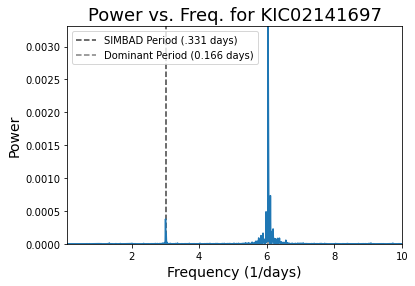

In [154]:
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,1,trueP=.331)

### The dominant frequency might be off by a factor of 2 from the actual frequency because this system is a contact binary and not a planet simply transiting a planet. This means that you'd observe several flux peaks/dips in the light curve over what is really only 1 true period since each star passes your view twice per cycle.

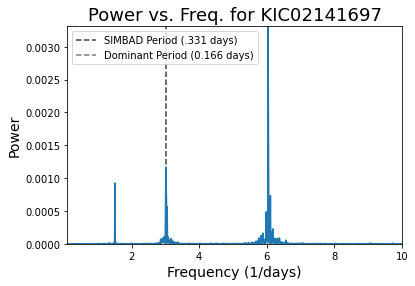

In [155]:
# Trying 2 Fourier terms instead of 1
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331)

## 2c) What if the power spectrum doesn't encompass the true frequency? (How can you end up with the wrong period?)

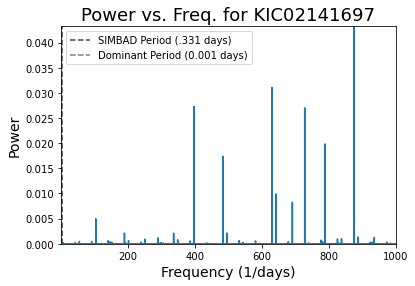

In [156]:
# Too large of a frequency range (.0001 to 1000)
LS('KIC02141697_LC_all.dat','KIC02141697',.001,10000,10000,1,trueP=.331)

### If you search too broad a frequency range, the binning is skewed and you miss where the true period is

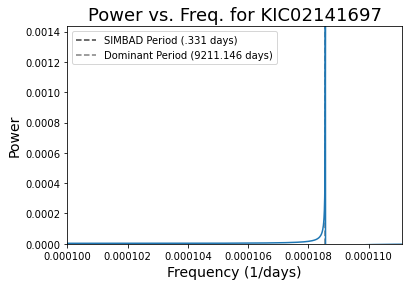

In [157]:
# Too small of a frequency range (.0001 to .0009)
LS('KIC02141697_LC_all.dat','KIC02141697',9000,10000,1000,1,trueP=.331)

### If you search too small a frequency range, you artificially select the greatest power over this interval as indicative of the period

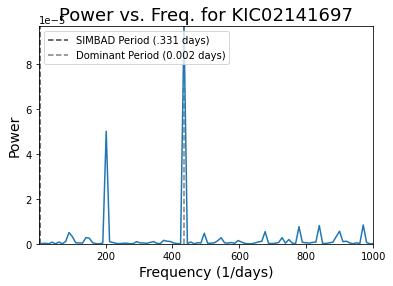

In [158]:
# Too few intervals over broad range (.01 to 1000 with 100 intervals)
LS('KIC02141697_LC_all.dat','KIC02141697',.001,100,100,1,trueP=.331)

### If you search a broad range with too few intervals over that range, the data can't be properly sparsed and you end up with a very skewed measurement of the period

## 2d) Use nterms >= 3 and describe how the resulting power spectra can lead to errors in your determination of the period 

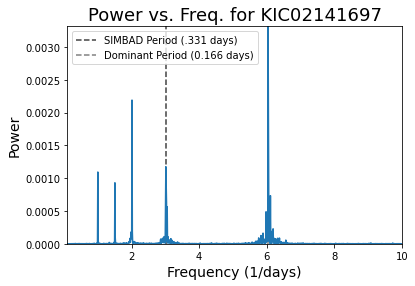

In [159]:
# Trying 3 Fourier terms
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,3,trueP=.331)

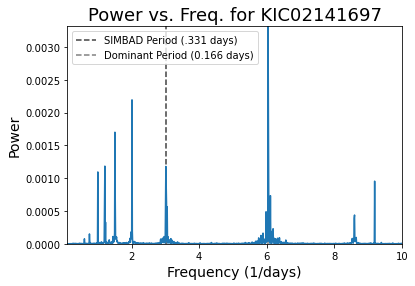

In [160]:
# Trying 5 Fourier terms
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,5,trueP=.331)

### If you use too many Fourier terms, then frequencies which are not representative of the true period are given too much weight and have more power than the true period. This would lead you to adopt a period that may not simply be an alias, but wrong entirely

## 2e) Make a phased light curve with the best-fit period. Then fold the light curve with a period of .5P and 2P to see if, when compared to the best-fit, those periods can be ruled out 

In [42]:
P_best = 0.331 # in days (from SIMBAD)

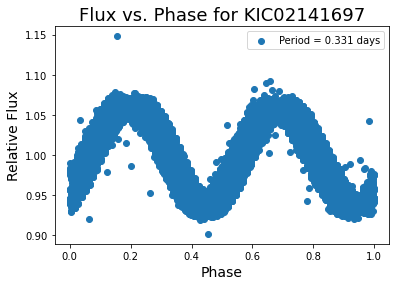

In [217]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',10000,period=P_best,plot='Phase')

### 1 full period captured!

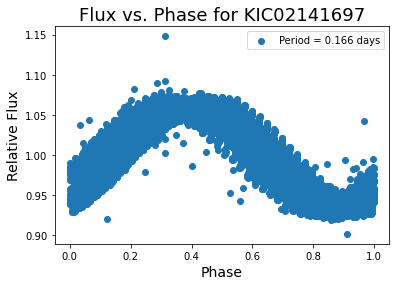

In [121]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',10000,period=P_best*.5,plot='Phase')

### Full period not captured so this must not be the true period

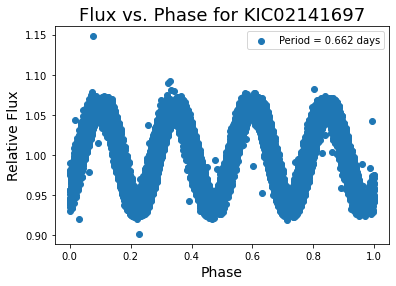

In [122]:
LightCurve('KIC02141697_LC_all.dat','KIC02141697',10000,period=P_best*2.,plot='Phase')

### Several full periods captured so this must not be the true period

## 2f) Use 100, 10, 1 day of data and show how the certainty of the period determination declines as the time baseline shrinks. What is the minimum time baseline to extract the true period for this object?

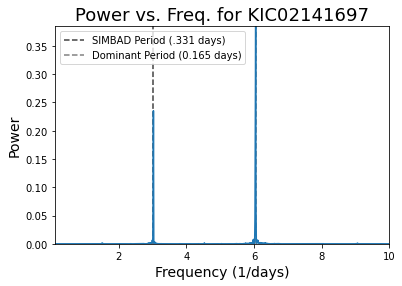

In [161]:
# Calculating periodogram for 100 days of data
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331,days=100)

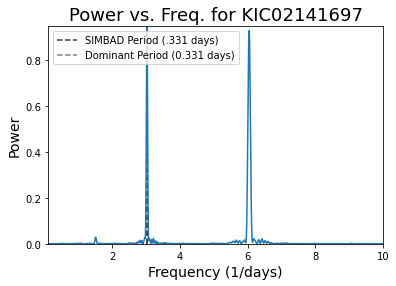

In [162]:
# Computing periodogram for 10 days of data
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331,days=10)

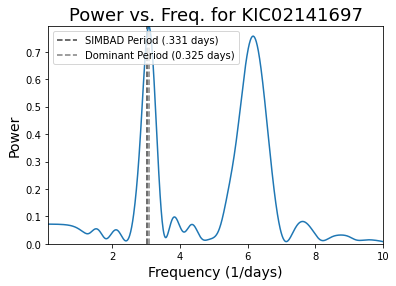

In [163]:
# Computing periodogram for 1 day of data
LS('KIC02141697_LC_all.dat','KIC02141697',.1,10,1000,2,trueP=.331,days=1)

### I would suggest 10 days as the minimum time baseline for determining the true period for this data. Any less than this and the peaks at the important frequencies are too broad to have high confidence in the period being selected.

# 3) Lomb-Scargle Analysis of Kepler-427

## 3a) Plot raw light curve of Kepler-427 (period = 10.3 days)

No handles with labels found to put in legend.


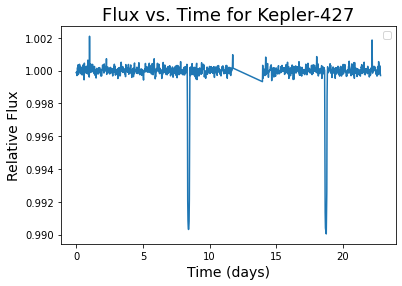

In [137]:
LightCurve('Kepler-427_LC_Q2.dat','Kepler-427',1000)

## 3b) Perform a Lomb-Scargle analysis on the light curve and locate possible periods 

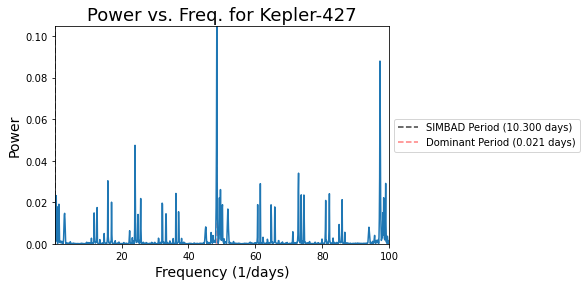

In [230]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',.01,100,1000,4,trueP=10.3)

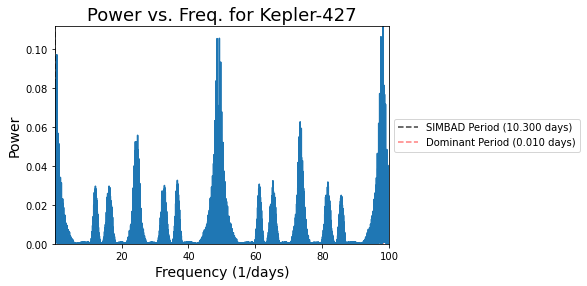

In [229]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',.01,100,10000,4,trueP=10.3)

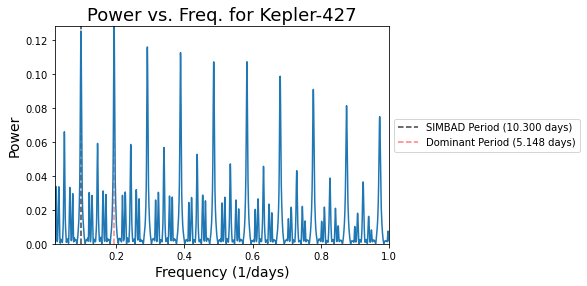

In [228]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',1,50,10000,4,trueP=10.3)

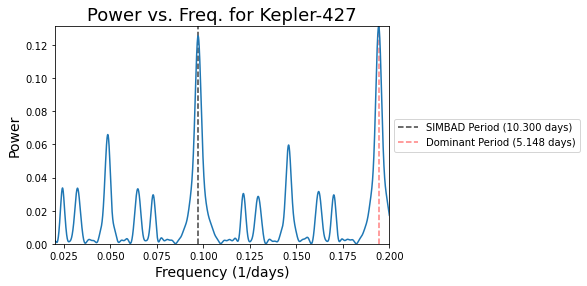

In [227]:
LS('Kepler-427_LC_Q2.dat','Kepler-427',5,50,10000,4,trueP=10.3)

### The two best periods are ~5.15 days and ~10.3 days. This is a signature of aliasing as one is almost exactly half of the other.

## 3c) Fold light curve at known period and plot phased light curve. Compare to published light curves.

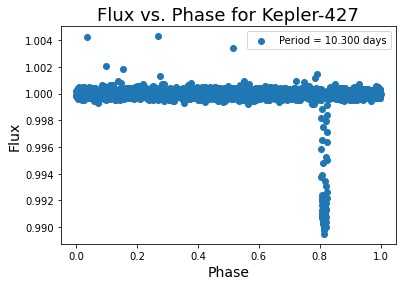

In [226]:
LightCurve('Kepler-427_LC_Q2.dat','Kepler-427',50000,period=10.3,plot='Phase')

### From page 3 of Hebrard et al. (2018) (https://arxiv.org/pdf/1409.8554.pdf)

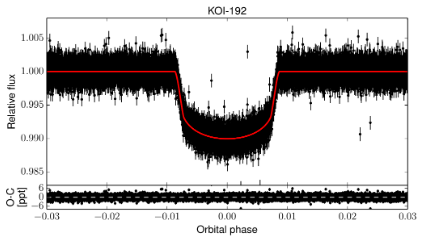

# 4) Radial velocity of planet-hosting star HD3651 (54 Psc)

## 4a) Plot observed radial velocity vs. time

## 4b) Perform Lomb-Scargle analysis to determine several probable period(s) and make phased velocity curve for each (let $t_0$ be arbitrary)

## 4c) Determine e, $\omega$, K, and $t_0$. Then create a model radial velocity curve that matches your data and compare to published values

## 4d) Compute $\chi^2$ and $\tilde{\chi}^2$ (reduced chi-squared) for the best-fitting model from 4c. Interpolate the model at the phases of your data to calculate the residuals from the best-fitting model.

## 4e) Use scipy.optimize.curve_fit or lmfit to obtain best parameters and report $\chi^2_{red}$. Use table of $\tilde{\chi}^2$ probabilities to give a probability of obtaining such a $\chi^2_{red}$ by chance and discuss if the model is a good fit to the data.